# Exploración preliminar de datos

In [2]:
# Bibliotecas requeridas
import sys
sys.path.append('../scr/')

import warnings
warnings.filterwarnings('ignore')

import loadAndTransformData as ltd
import viewDataFunctions as vdf


import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
import os
import random

In [3]:
# Carga de datos
data = ltd.combinar_csv_por_prefijo('../data/raw/', 'Minimarket_Sales_Data')

In [4]:
# Descripcion general de la base de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152781 entries, 0 to 152780
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   fecha                 152781 non-null  object 
 1   codigo_factura        152781 non-null  int64  
 2   mnt_total_a_pagar     152781 non-null  float64
 3   cant_items            152781 non-null  int64  
 4   familia               152524 non-null  object 
 5   categoria             152781 non-null  object 
 6   subcategoria          152781 non-null  object 
 7   codigo_producto       152781 non-null  float64
 8   cantidad_vendida      152781 non-null  float64
 9   venta_bruta_producto  152781 non-null  float64
 10  venta_neta_producto   152781 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 12.8+ MB


In [5]:
# Cunatas variables numericas y categoricas hay y cuales son
print(f'Hay {len(vdf.cats_y_nums(data)[1])} variables numericas y {len(vdf.cats_y_nums(data)[0])} categoricas')
print(f'Numericas: {vdf.cats_y_nums(data)[1]}\nCategoricas:{vdf.cats_y_nums(data)[0]}')

Hay 7 variables numericas y 4 categoricas
Numericas: ['codigo_factura', 'mnt_total_a_pagar', 'cant_items', 'codigo_producto', 'cantidad_vendida', 'venta_bruta_producto', 'venta_neta_producto']
Categoricas:['fecha', 'familia', 'categoria', 'subcategoria']


In [6]:
# Modificar a tipo object las columnas codigo_factura, codigo_producto
data = ltd.convert_columns_to_category(data, ['codigo_factura', 'codigo_producto', 'familia', 'categoria', 'subcategoria'])
data['fecha'] = pd.to_datetime(data['fecha'])

In [7]:
# Confirmar modificación de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152781 entries, 0 to 152780
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   fecha                 152781 non-null  datetime64[ns]
 1   codigo_factura        152781 non-null  category      
 2   mnt_total_a_pagar     152781 non-null  float64       
 3   cant_items            152781 non-null  int64         
 4   familia               152524 non-null  category      
 5   categoria             152781 non-null  category      
 6   subcategoria          152781 non-null  category      
 7   codigo_producto       152781 non-null  category      
 8   cantidad_vendida      152781 non-null  float64       
 9   venta_bruta_producto  152781 non-null  float64       
 10  venta_neta_producto   152781 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(4), int64(1)
memory usage: 9.8 MB


In [8]:
#Cantidad de columnas y registros del dataset
data.shape

(152781, 11)

In [9]:
# Visuallización del contenido
data.head(10)

,fecha,codigo_factura,mnt_total_a_pagar,cant_items,familia,categoria,subcategoria,codigo_producto,cantidad_vendida,venta_bruta_producto,venta_neta_producto
0,2024-01-01,2347409568,9470.0,5,Refrigerados,Comida Preparada,Ready To Eat,12000395.0,1.0,4390.0,3689.0
1,2024-01-01,2347409568,9470.0,5,Alimentos Dulces,Dulce,Típicos,12000516.0,1.0,1950.0,1950.0
2,2024-01-01,2347409568,9470.0,5,Empaques y Bazar,Otros,Empaques,12000162.0,1.0,190.0,104.0
3,2024-01-01,2347409568,9470.0,5,Alimentos Sal,Pasabocas,Familiar,12003745.0,1.0,1850.0,1762.0
4,2024-01-01,2347409568,9470.0,5,Alimentos Dulces,Dulce,Otros,12005093.0,1.0,1090.0,916.0
5,2024-01-01,2371202658,12490.0,2,Alimentos Dulces,Dulce,Otros,12002953.0,1.0,1500.0,1261.0
6,2024-01-01,2371202658,12490.0,2,Mascotas,Mascotas,Alimento Seco,12005336.0,1.0,10990.0,10467.0
7,2024-01-01,2390870650,56610.0,15,Perecederos,Fruver,Frutas,12000110.0,1.0,3290.0,3290.0
8,2024-01-01,2390870650,56610.0,15,Perecederos,Fruver,Verduras,12005183.0,1.0,1090.0,1090.0
9,2024-01-01,2390870650,56610.0,15,Aseo,Aseo Hogar,Detergentes,12000178.0,1.0,4990.0,4193.0


In [10]:
# Estadísticas generales
data[['mnt_total_a_pagar','cantidad_vendida', 'venta_bruta_producto', 'venta_neta_producto', 'cant_items']].describe().round(2)

,mnt_total_a_pagar,cantidad_vendida,venta_bruta_producto,venta_neta_producto,cant_items
count,152781.00,152781.00,152781.00,152781.00,152781.00
mean,54521.61,1.32,5744.16,5005.62,12.12
std,66880.94,1.49,5955.15,5225.90,13.67
min,-196110.00,-18.00,-139980.00,-97025.00,-35.00
25%,14990.00,1.00,2650.00,2269.00,4.00
50%,32970.00,1.00,4290.00,3689.00,8.00
75%,69980.00,1.00,6780.00,5874.00,16.00
max,1186350.00,96.00,349650.00,293824.00,212.00


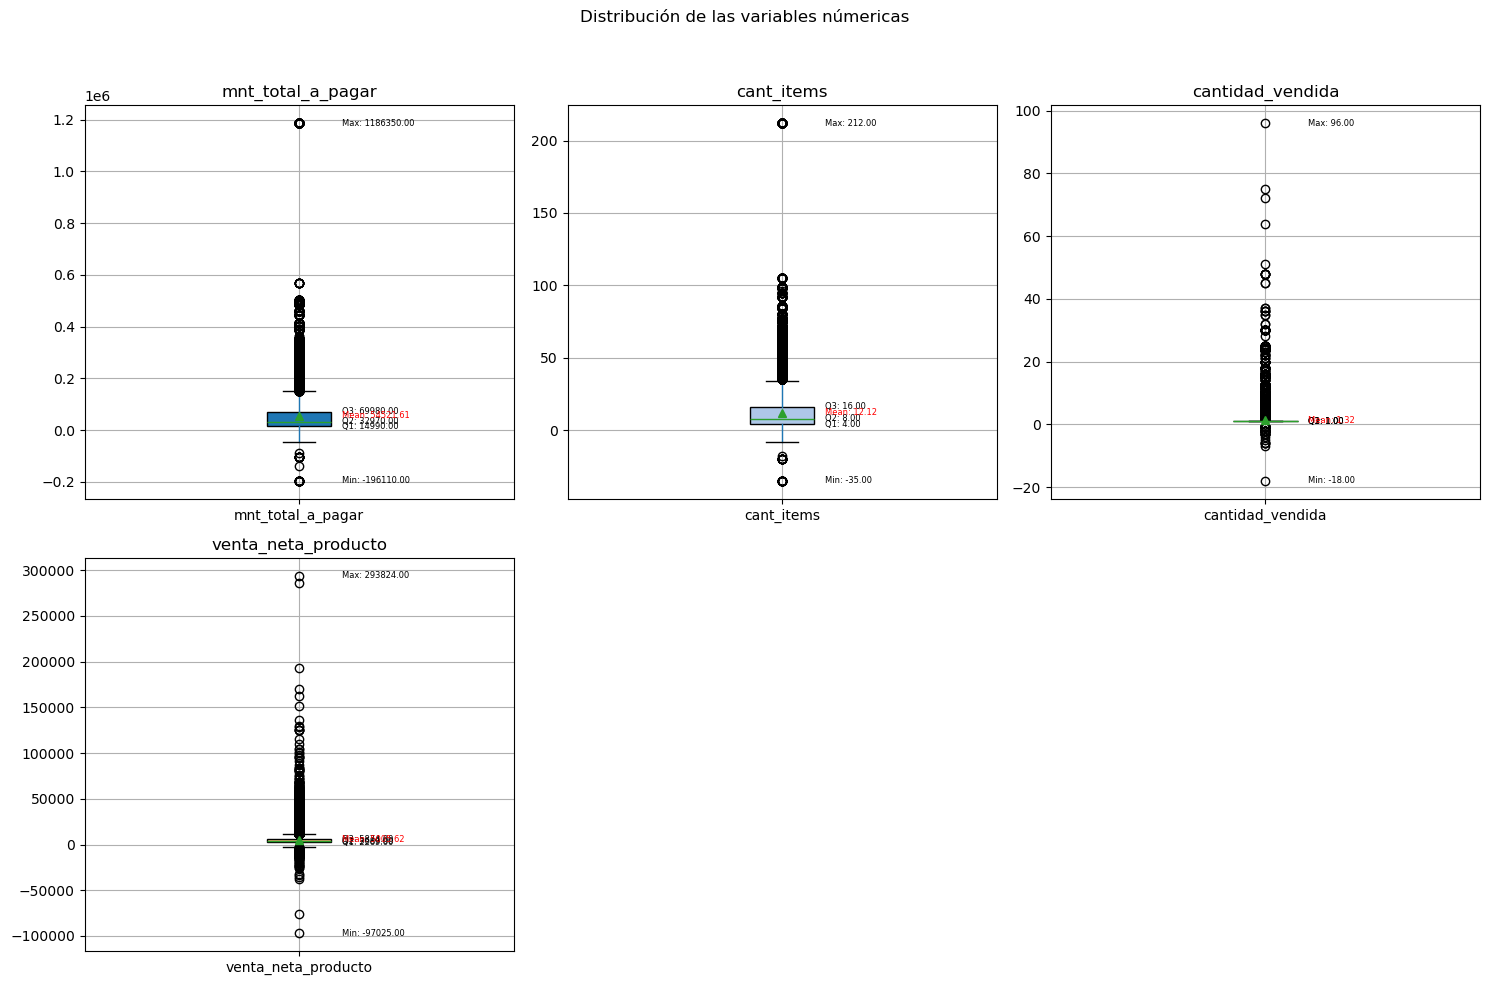

In [11]:
cajas = vdf.graficar_boxplots(data, ['mnt_total_a_pagar', 'cant_items', 'cantidad_vendida', 'venta_neta_producto'], titulo='Distribución de las variables númericas')

## NOTA

Se observa que la distribución de 'mnt_total_a_pagar', 'cantidad_vendida', 'venta_neta_producto' contienen valores negativos. De acuerdo, con lo informado por negocio, esto ocurre por que existen devoluciones de producto durante la transacción o anulaciones de facturas, que se registran como valores negativos. 

Para evitar errores de interpretación se agrupan los datos sumando el valor de las columnas 'cantidad_vendida', 'venta_bruta_producto', 'venta_neta_producto'. 

In [13]:
#  Obtener el dataframe agrupado
df_agrupado = ltd.procesar_y_agrupar(data, '../data/temp/chunks/', ['fecha', 'codigo_factura', 'mnt_total_a_pagar', 'cant_items', 
                                                                'codigo_producto', 'familia', 'categoria', 'subcategoria'], 
                                 ['cantidad_vendida', 'venta_bruta_producto', 'venta_neta_producto'], 'sum', 
                                 chunksize_guardado=10**6, chunksize_lectura=10**5)


In [14]:
# Excluir facturas anuladas
df_filtrado = df_agrupado[df_agrupado['mnt_total_a_pagar']>0]

In [15]:
# cambiar data a df_filtrado
data = df_filtrado

In [16]:
# Modificar a tipo object las columnas codigo_factura, codigo_producto
#data['fecha'] = data['fecha'].dt.to_period('M')
data = ltd.convert_columns_to_category(data, ['codigo_factura', 'codigo_producto', 'familia', 'categoria', 'subcategoria'])
data['fecha'] = pd.to_datetime(data['fecha'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151733 entries, 0 to 52491
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   fecha                 151733 non-null  datetime64[ns]
 1   codigo_factura        151733 non-null  category      
 2   mnt_total_a_pagar     151733 non-null  float64       
 3   cant_items            151733 non-null  int64         
 4   codigo_producto       151733 non-null  category      
 5   familia               151733 non-null  category      
 6   categoria             151733 non-null  category      
 7   subcategoria          151733 non-null  category      
 8   cantidad_vendida      151733 non-null  float64       
 9   venta_bruta_producto  151733 non-null  float64       
 10  venta_neta_producto   151733 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(4), int64(1)
memory usage: 10.9 MB


In [18]:
# Cunatas variables numericas y categoricas hay y cuales son
print(f'Hay {len(vdf.cats_y_nums(data)[1])} variables numericas y {len(vdf.cats_y_nums(data)[0])} categoricas')
print(f'Numericas: {vdf.cats_y_nums(data)[1]}\nCategoricas:{vdf.cats_y_nums(data)[0]}')

Hay 5 variables numericas y 5 categoricas
Numericas: ['mnt_total_a_pagar', 'cant_items', 'cantidad_vendida', 'venta_bruta_producto', 'venta_neta_producto']
Categoricas:['codigo_factura', 'codigo_producto', 'familia', 'categoria', 'subcategoria']


In [19]:
data['fecha'].value_counts()

fecha
2024-03-01    55097
2024-01-01    49653
2024-02-01    46983
Name: count, dtype: int64

In [20]:
estadistica1 = data[['cantidad_vendida', 'venta_bruta_producto', 'venta_neta_producto', 'cant_items']].describe().round(2)

In [21]:
# Agrupar por facturas y monto
data_invoice = data.groupby(['codigo_factura'])['mnt_total_a_pagar'].first().reset_index()
estadistica2 = data_invoice.describe().round(2)

In [22]:
estadisticas = pd.concat([estadistica1, estadistica2], axis=1)
estadisticas

,cantidad_vendida,venta_bruta_producto,venta_neta_producto,cant_items,mnt_total_a_pagar
count,151733.00,151733.00,151733.00,151733.00,39123.00
mean,1.33,5784.49,5039.25,12.13,22434.31
std,1.50,5940.98,5217.42,13.63,30961.94
min,1.00,190.00,104.00,1.00,190.00
25%,1.00,2650.00,2276.00,4.00,5680.00
50%,1.00,4300.00,3773.00,8.00,12990.00
75%,1.00,6790.00,5874.00,16.00,26420.00
max,96.00,349650.00,293824.00,212.00,1186350.00


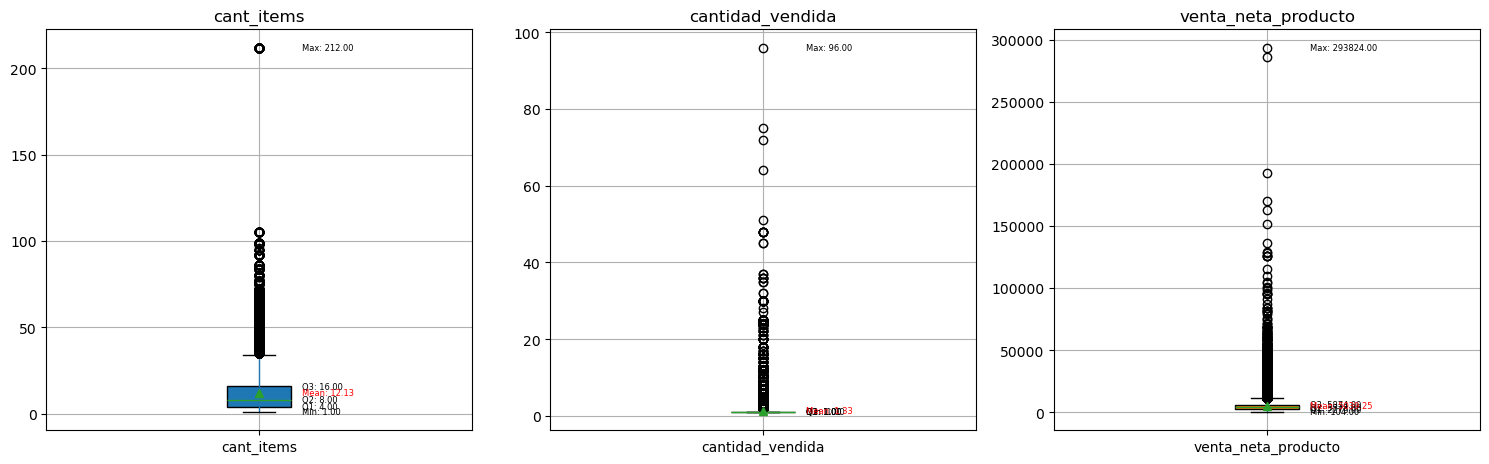

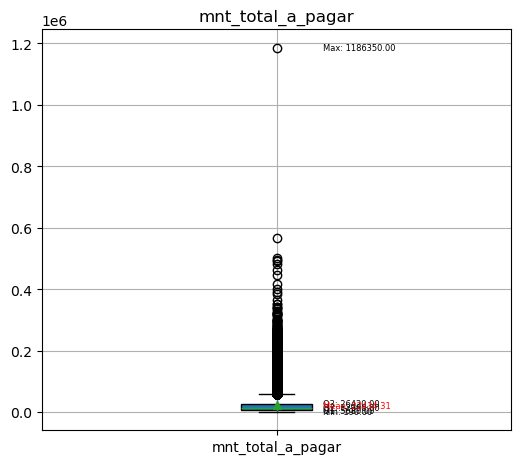

In [23]:
cajas1 = vdf.graficar_boxplots(data, ['cant_items', 'cantidad_vendida', 'venta_neta_producto'], titulo=None)
cajas2 = vdf.graficar_boxplots(data_invoice, ['mnt_total_a_pagar',], titulo=None)

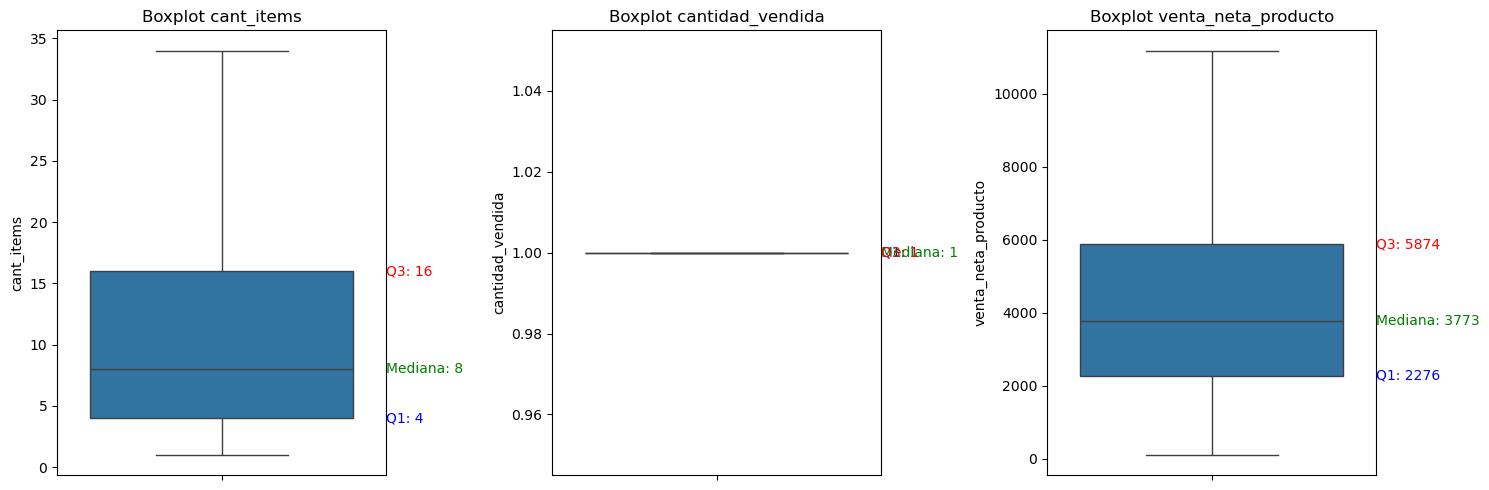

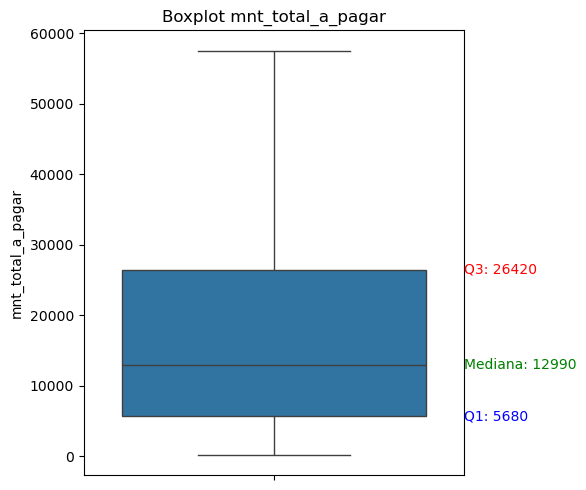

In [24]:
vdf.uni_boxplot(data,['cant_items', 'cantidad_vendida', 'venta_neta_producto'])
vdf.uni_boxplot(data_invoice,['mnt_total_a_pagar'])

Histogramas de las variables numericas del dataset:


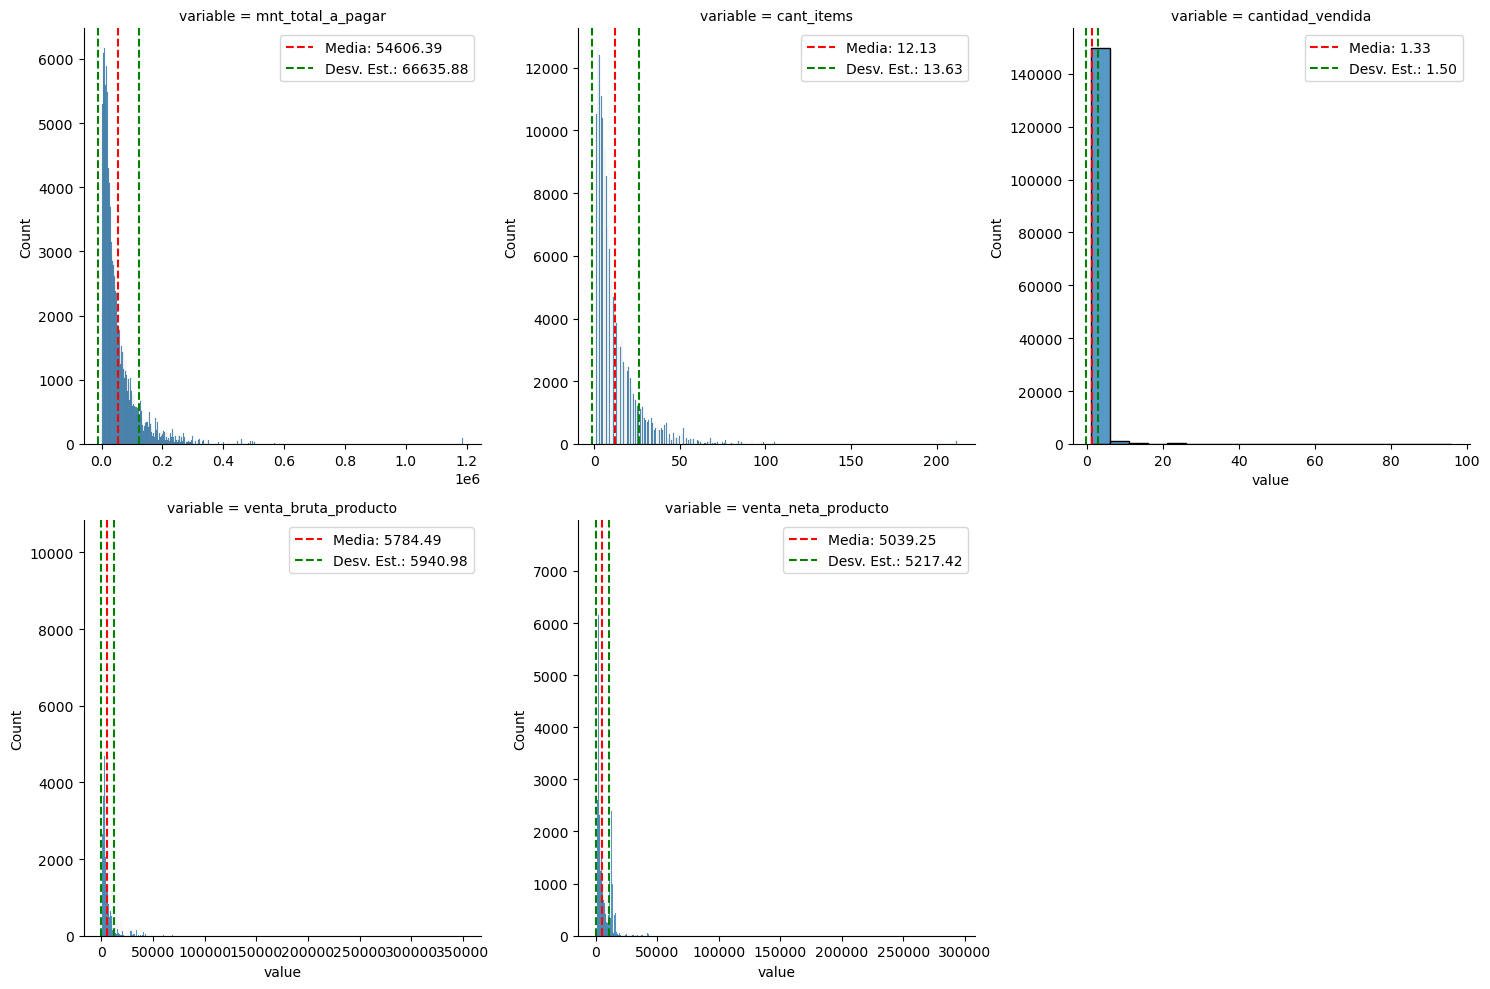

In [25]:
#Histogramas de las variables numericas
vdf.histog_mean_desv(data,3)

<Axes: >

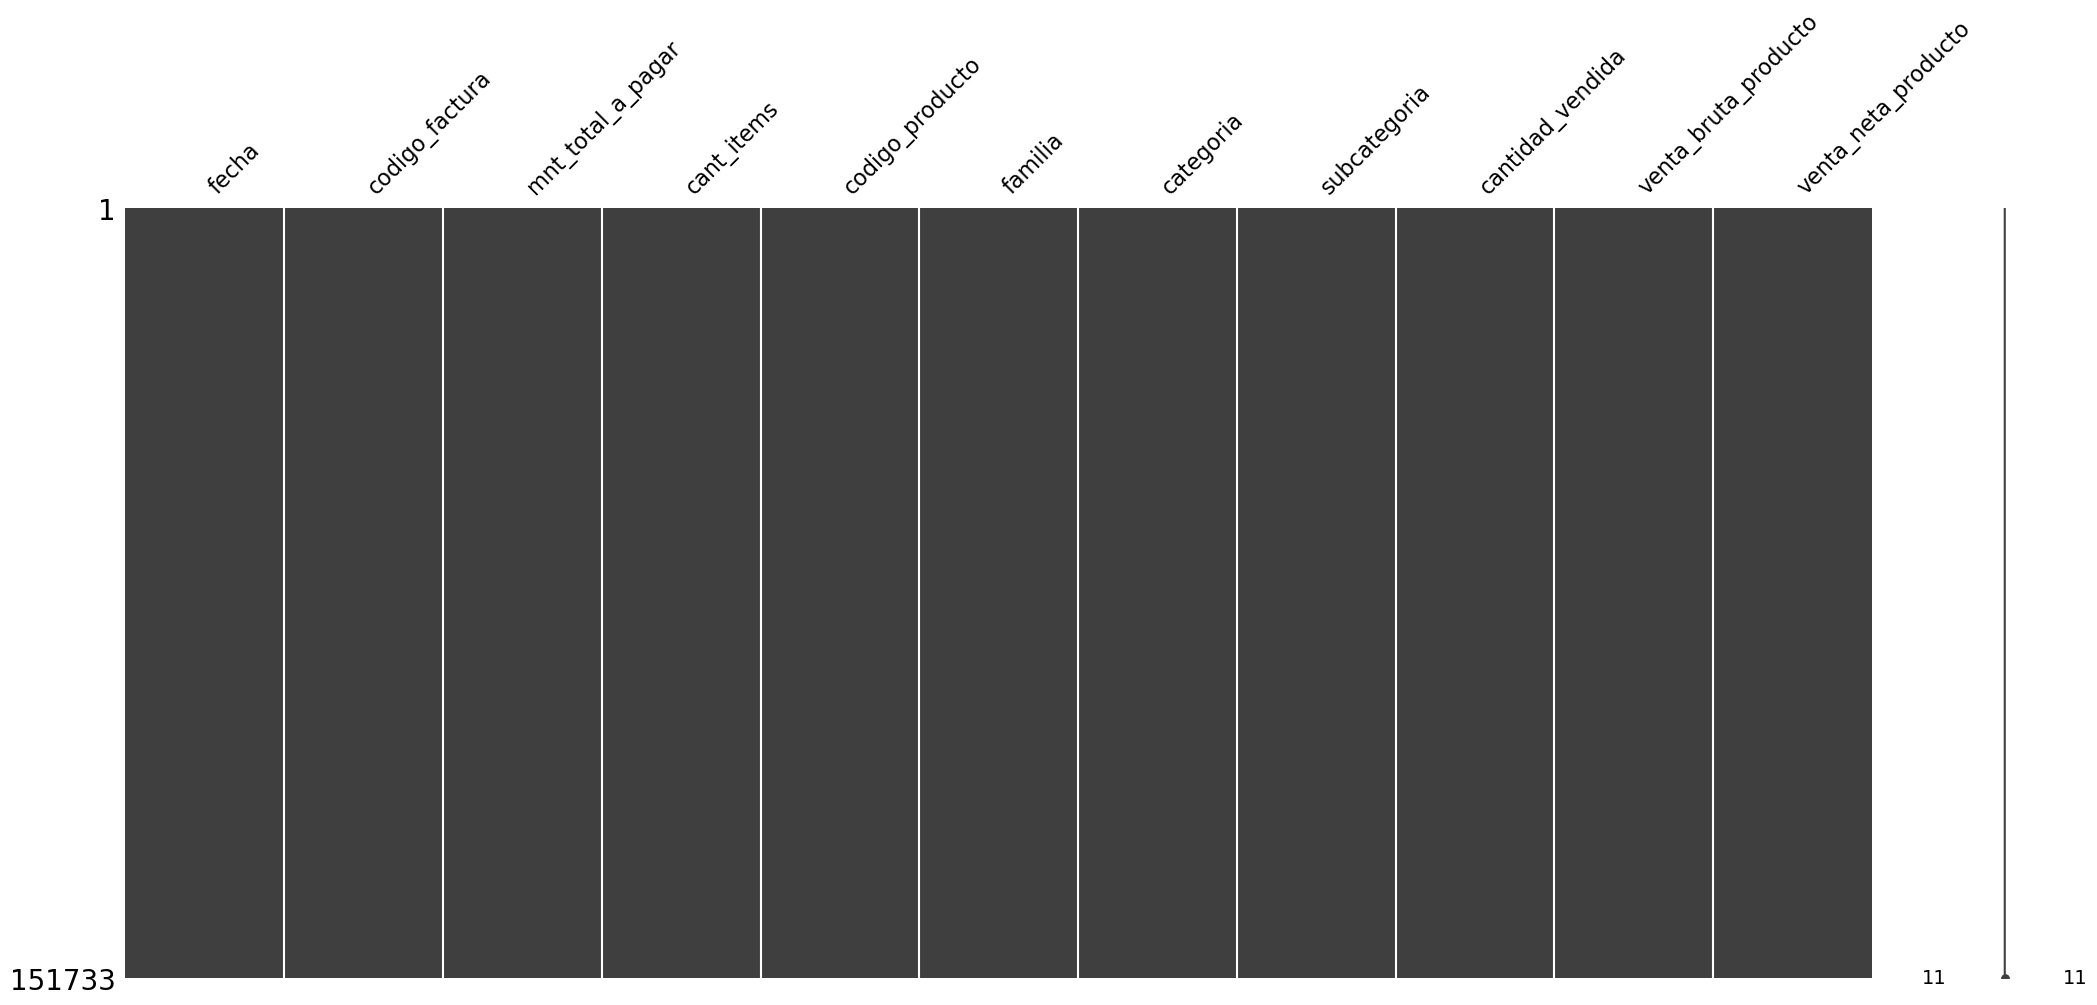

In [26]:
# Analisis Faltantes
msno.matrix(data)

<Axes: >

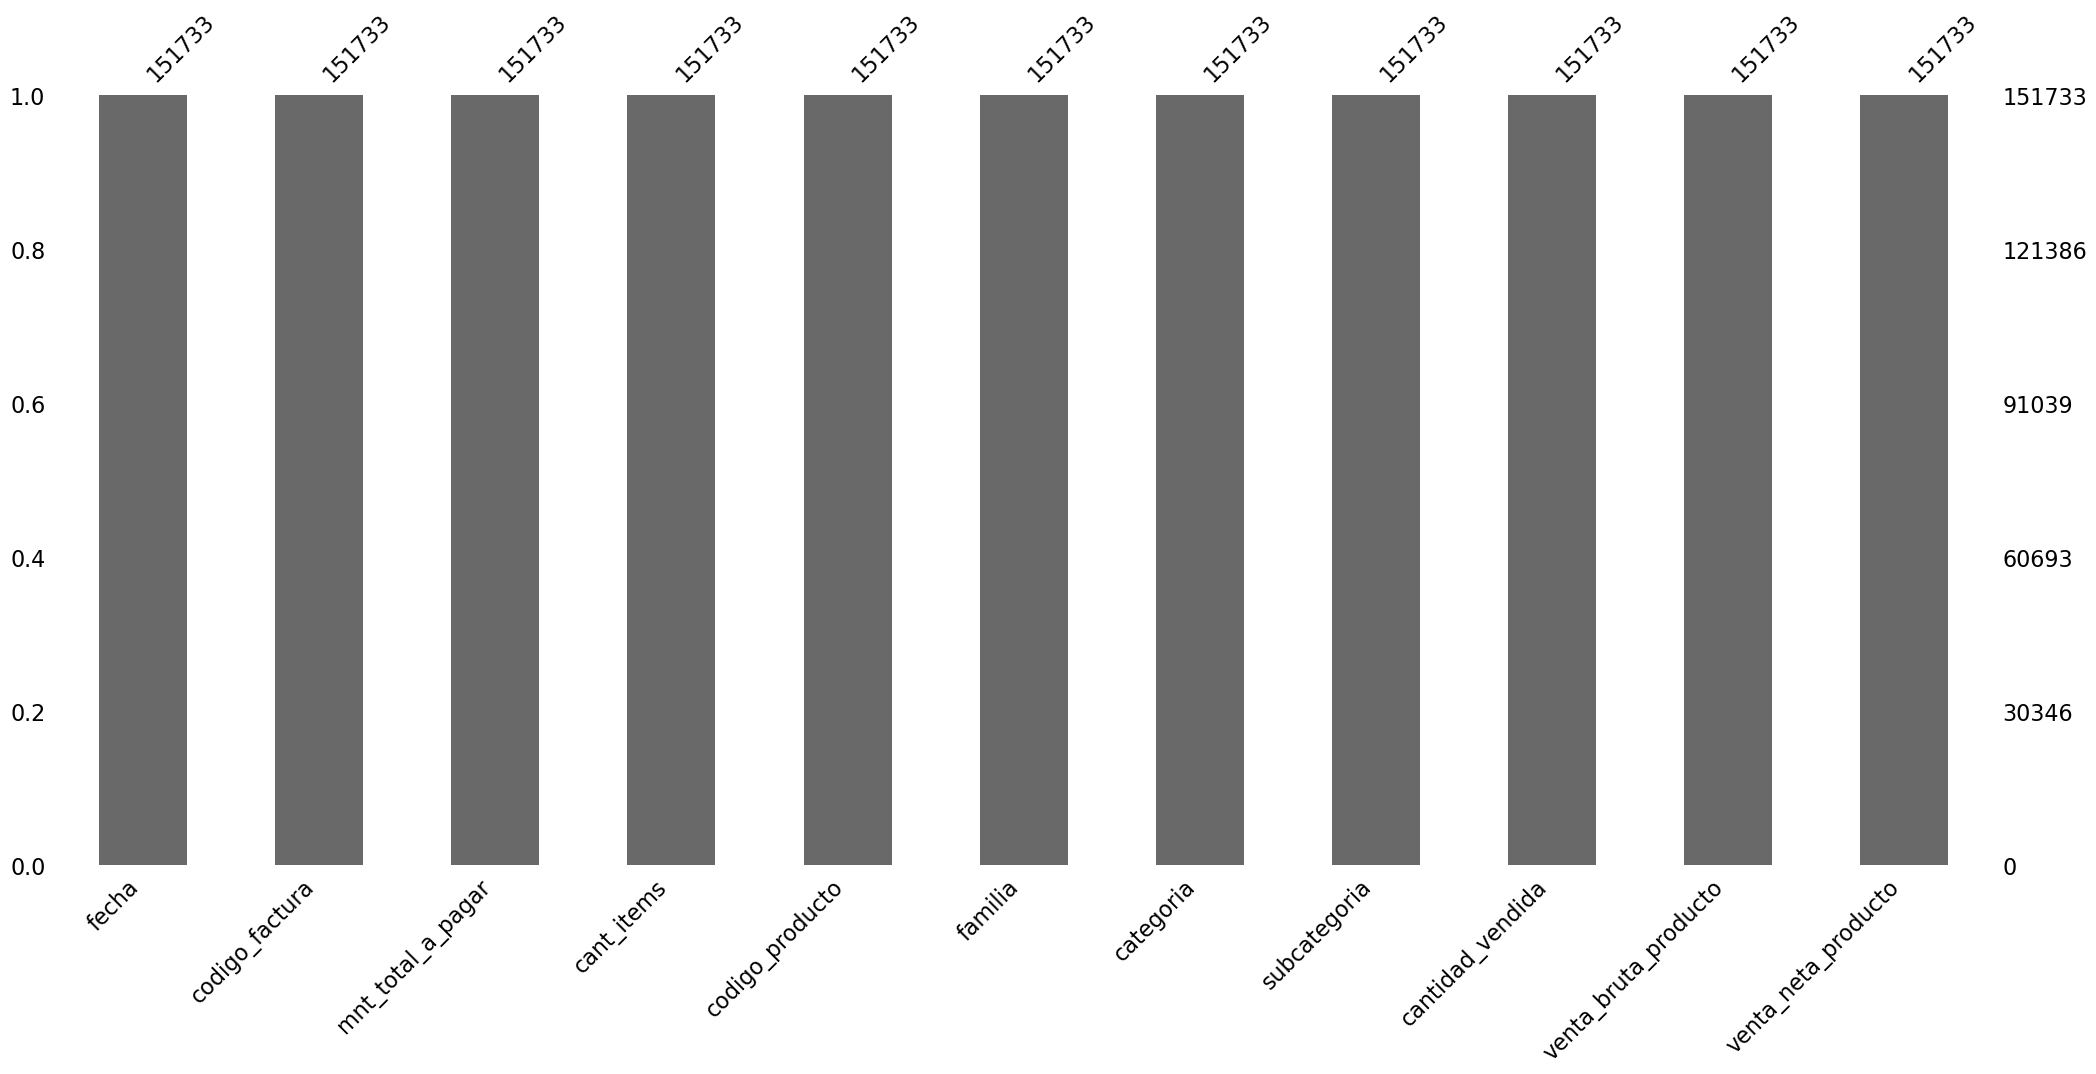

In [27]:
msno.bar(data)

In [28]:
vdf.cantidades_faltantes(data)

Cantidades faltantes del dataset:
fecha                   0
codigo_factura          0
mnt_total_a_pagar       0
cant_items              0
codigo_producto         0
familia                 0
categoria               0
subcategoria            0
cantidad_vendida        0
venta_bruta_producto    0
venta_neta_producto     0
dtype: int64
% Faltantes del dataset:
fecha                   0.0
codigo_factura          0.0
mnt_total_a_pagar       0.0
cant_items              0.0
codigo_producto         0.0
familia                 0.0
categoria               0.0
subcategoria            0.0
cantidad_vendida        0.0
venta_bruta_producto    0.0
venta_neta_producto     0.0
dtype: float64


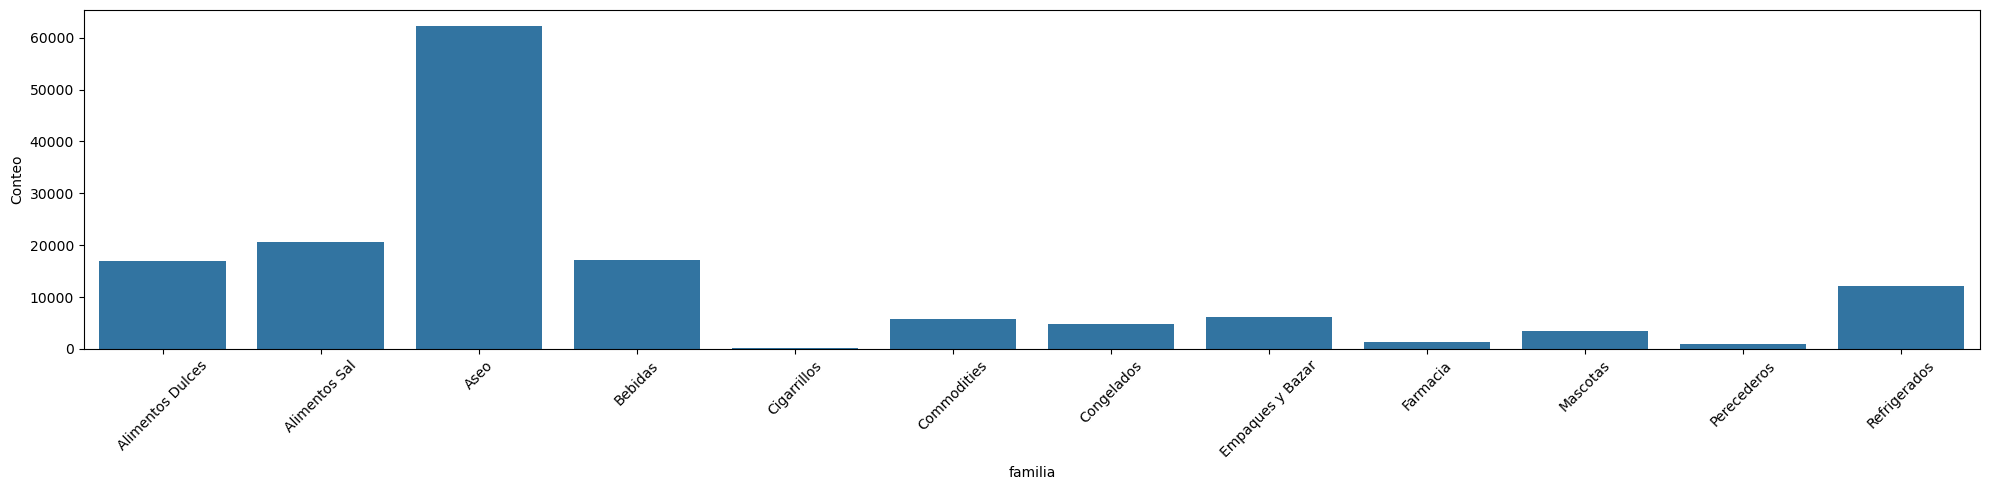

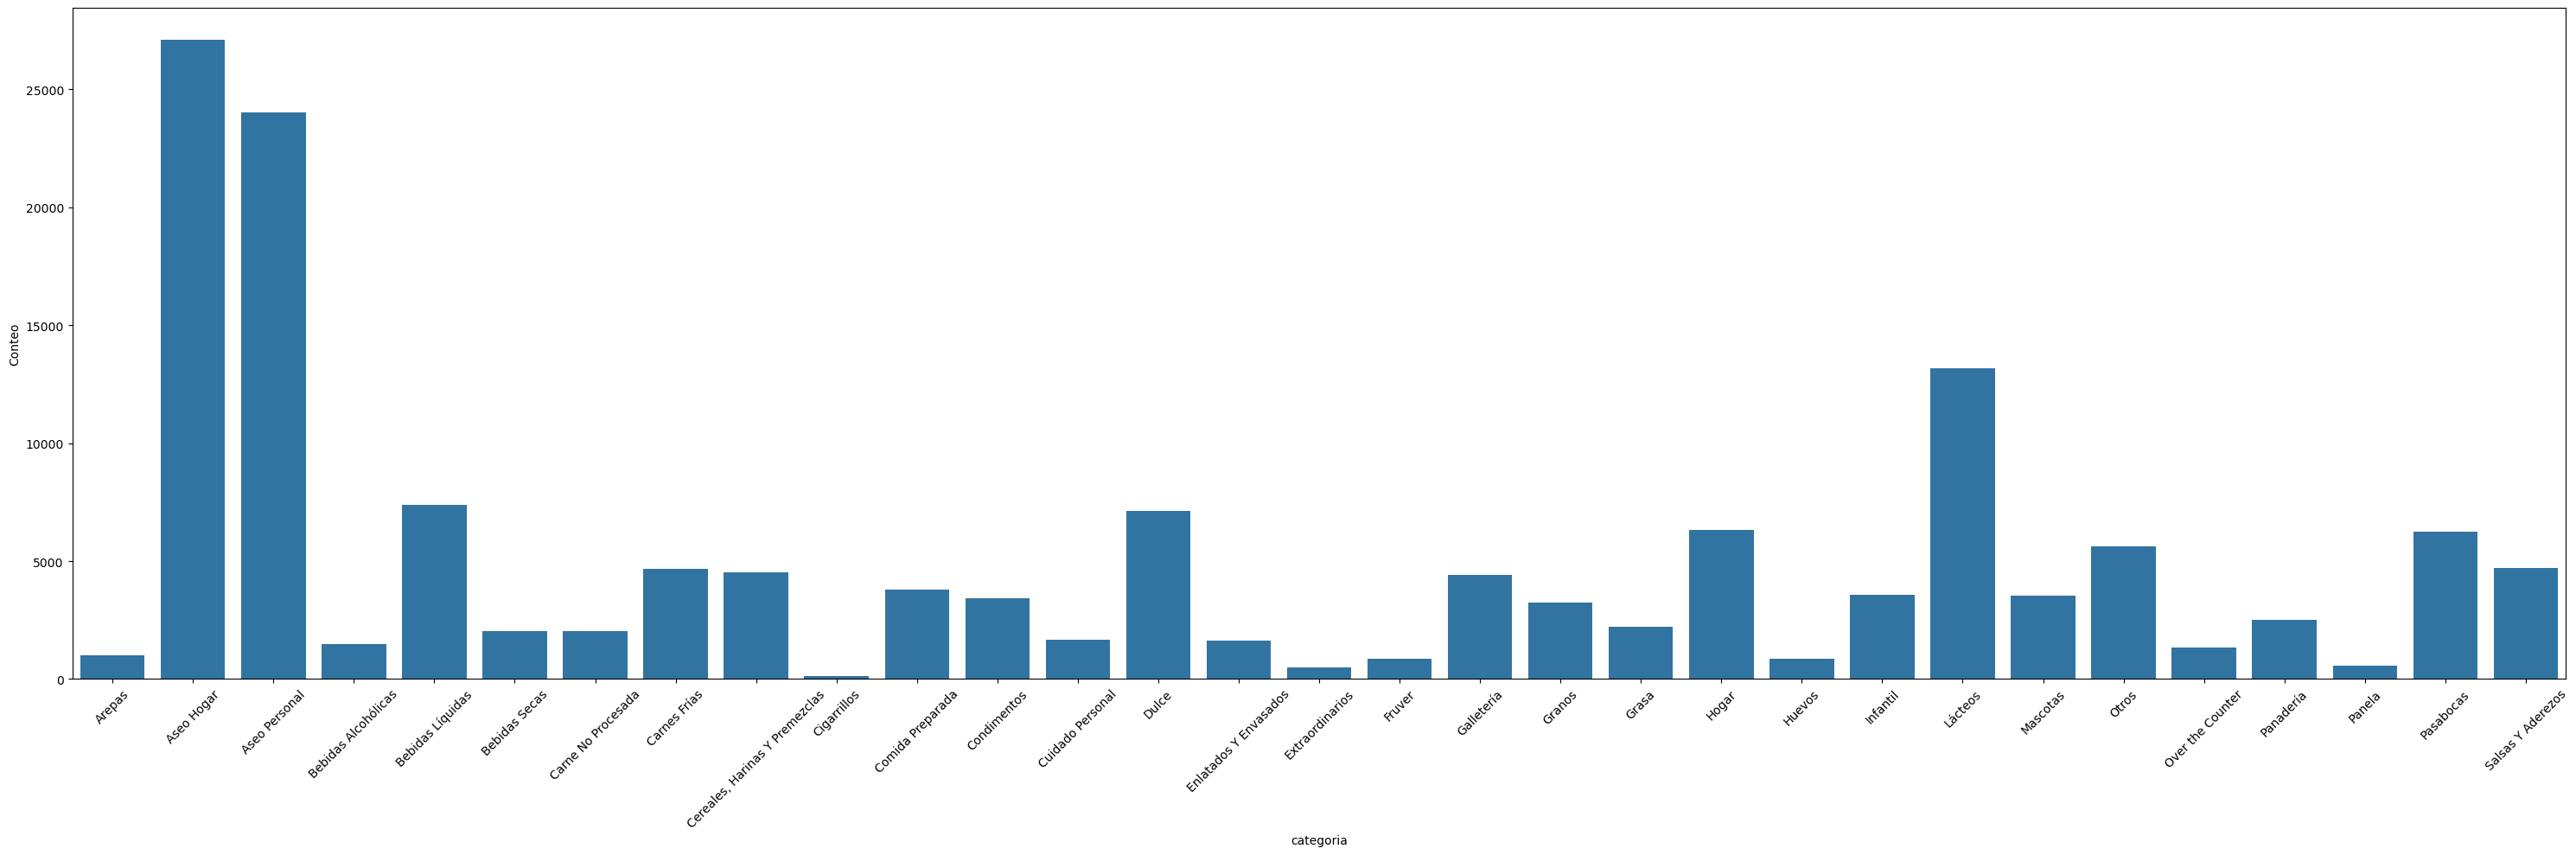

In [29]:
vdf.histog_categoricos(data['familia'],1,20,5)
vdf.histog_categoricos(data['categoria'],1,30,10)



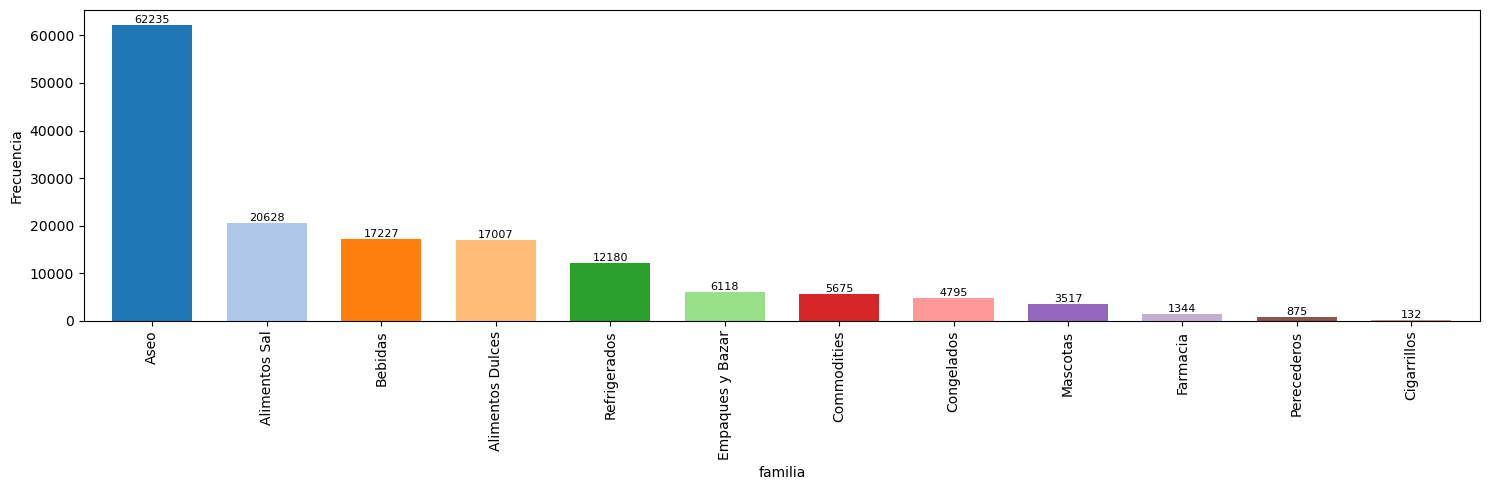

In [30]:
fig = vdf.graficoBarras(data, 'familia', None, figsize=(15, 5),)

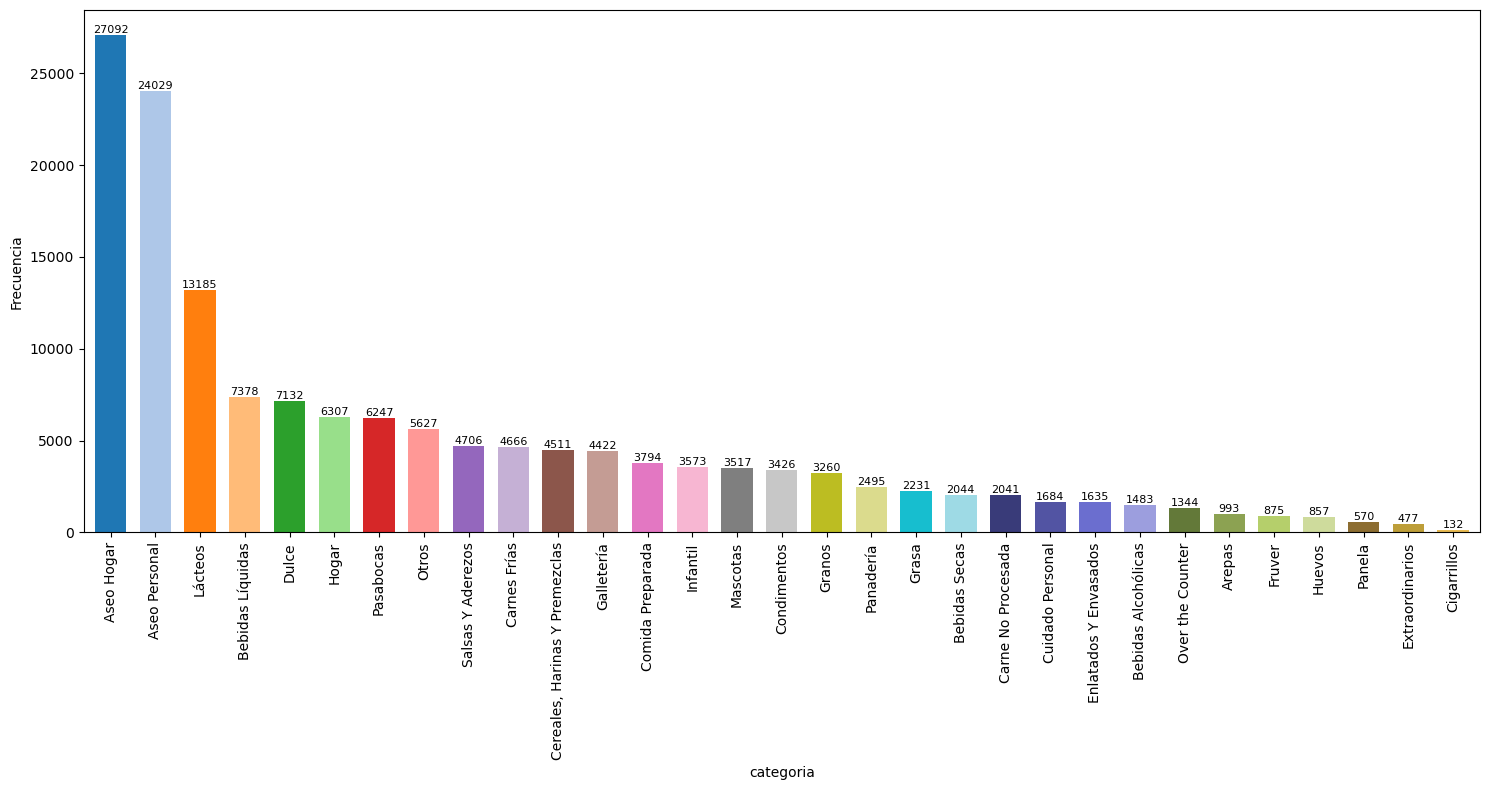

In [31]:
fig = vdf.graficoBarras(data, 'categoria', None, figsize=(15, 8))

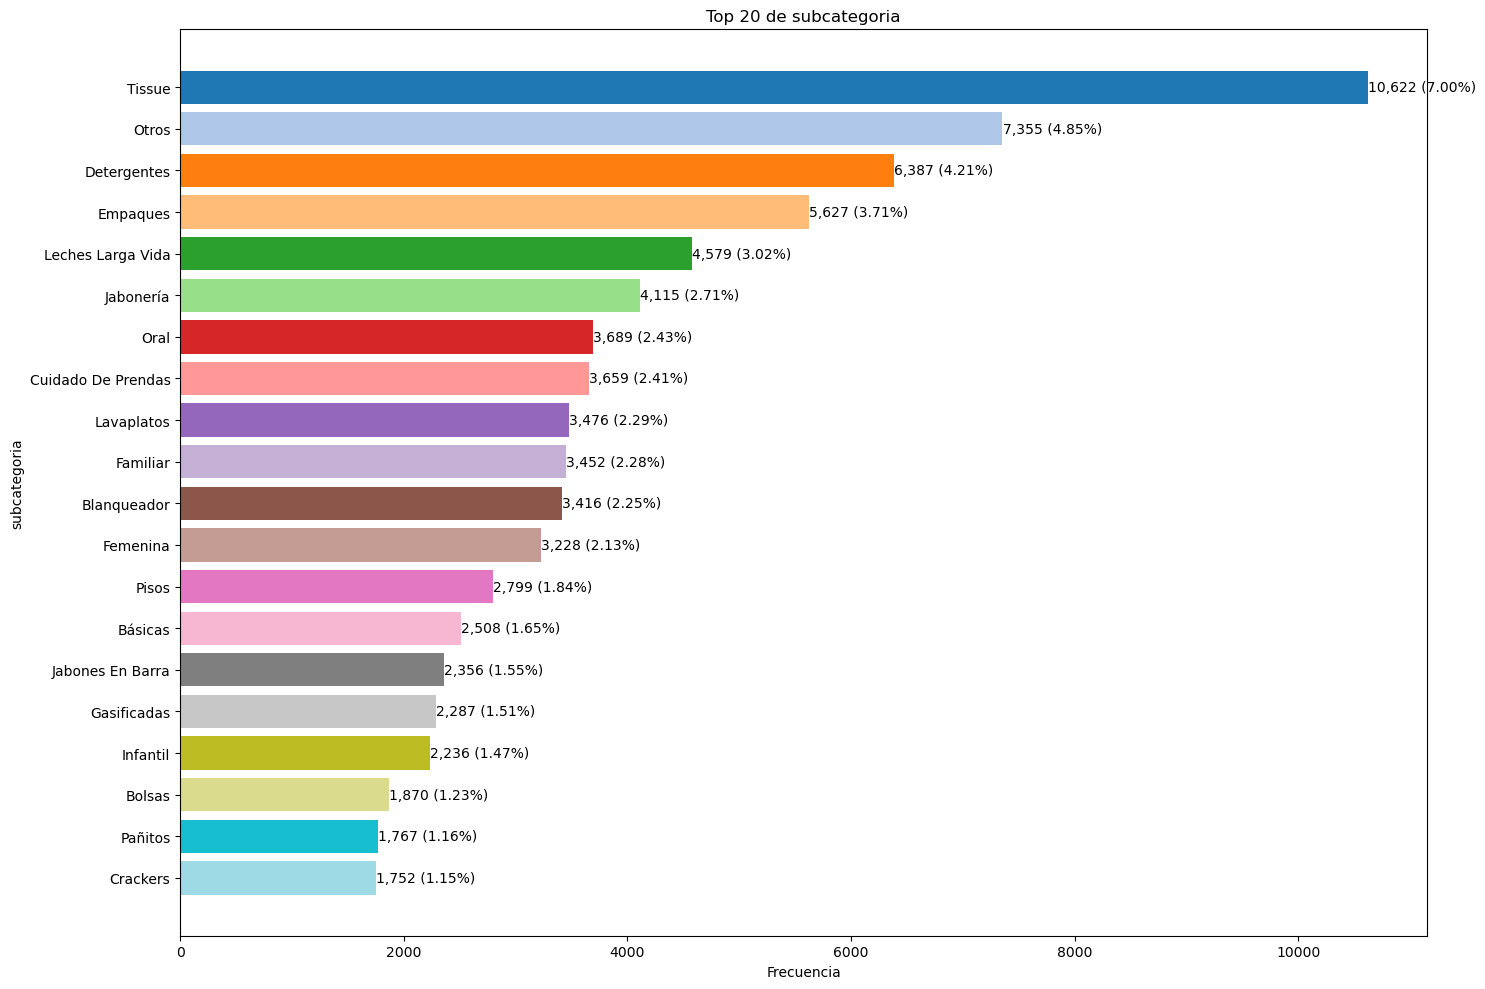

In [32]:
fig = vdf.graficar_top_categorias(data, 'subcategoria', top=20, figsize=(15,10))
#graficar_top_categorias(df, columna, top=10, color=colores_combinados, figsize=(5,10))

In [38]:
vdf.top_categorias(data, 'codigo_producto', top=50)

,codigo_producto,cuenta,porcentaje
0,12004365.0,3971,2.62
1,12004364.0,3710,2.45
2,12000089.0,3215,2.12
3,12000543.0,2825,1.86
4,12006120.0,2786,1.84
5,12000162.0,2183,1.44
6,12000131.0,1937,1.28
7,12000178.0,1806,1.19
8,12000222.0,1373,0.90
9,12005519.0,1364,0.90


In [ ]:
vdf.box_grouped(data,'cant_items',['familia','categoria'],c=1,cs=30,rs=10)

In [ ]:
vdf.box_grouped(data,'mnt_total_a_pagar',['familia','categoria'],c=1,cs=30,rs=10)

In [ ]:
vdf.box_grouped(data,'venta_neta_producto',['familia','categoria'],c=1,cs=30,rs=10)

In [ ]:
vdf.contingencia(data,'familia',3000)

In [ ]:
vdf.contingencia(data,'categoria',2000)

In [ ]:
vdf.linea(data,'fecha','venta_neta_producto',15000000,25000000)

In [ ]:
vdf.linea(data,'fecha','cantidad_vendida',3000,6000)

In [ ]:
import pandas as pd
import string

def generar_etiquetas_consecutivas(n):
    """
    Genera etiquetas consecutivas en el formato A, B, ..., Z, A1, B1, ..., Z1, A2, B2, ..., etc.
    
    :param n: Número total de etiquetas a generar.
    :return: Lista de etiquetas.
    """
    etiquetas = []
    letras = list(string.ascii_uppercase)
    
    for i in range(n):
        if i < 26:
            etiquetas.append(letras[i])
        else:
            ciclo = i // 26
            indice = i % 26
            etiquetas.append(f"{letras[indice]}{ciclo}")
    
    return etiquetas


In [ ]:
n_productos = data['codigo_producto'].nunique()

# Generar etiquetas
etiquetas = ltd.generar_etiquetas_consecutivas(n_productos)

# Crear un diccionario para mapear los productos originales a las nuevas etiquetas
mapa_productos = dict(zip(data['codigo_producto'].unique(), etiquetas))

# Renombrar los productos en la columna 'producto'
data['codigo_producto'] = data['codigo_producto'].map(mapa_productos)

In [ ]:
data

In [ ]:
fig= vdf.pareto1(data,'familia','venta_neta_producto', corte=80, r=8, escala='M')
# Guardar la figura en un archivo
nameFile = 'Diagrama de Pareto. Venta neta por Familia de producto.png'
vdf.guardar_grafico(fig, f'../reports/figures/{nameFile}')

In [ ]:
fig= vdf.pareto1(data,'categoria','venta_neta_producto', corte=80, r=8, escala='M')
# Guardar la figura en un archivo
nameFile = 'Diagrama de Pareto. Venta neta por Categoria de producto.png'
vdf.guardar_grafico(fig, f'../reports/figures/{nameFile}')

In [ ]:
fig= vdf.pareto1(data,'codigo_producto','venta_neta_producto', t=40, corte=80, r=8, escala='M')
# Guardar la figura en un archivo
nameFile = 'Diagrama de Pareto. Venta neta por producto.png'
vdf.guardar_grafico(fig, f'../reports/figures/{nameFile}')

In [ ]:
fig= vdf.pareto1(data,'subcategoria','cantidad_vendida', t=60, corte=80, r=8, )
# Guardar la figura en un archivo
nameFile = 'Diagrama de Pareto. Venta neta por Subcategoria de producto.png'
vdf.guardar_grafico(fig, f'../reports/figures/{nameFile}')

In [ ]:
# Outliers variable: mnt_total_a_pagar
vdf.outliers(data,'mnt_total_a_pagar')

In [ ]:
vdf.histog_mean_desv(vdf.outliers(data,'mnt_total_a_pagar'),1)

In [ ]:
# Outliers variable: cantidad_items
# Outliers variable: mnt_total_a_pagar
vdf.outliers(data,'cant_items')